#  Linear Regression from scratch

The goal of a linear regression is to fit a linear line to a set of points. 

![Linear_regression.svg](images/Linear_regression.svg.png)

In order to find the best line, we need to choose a way to classify each line attempt. 
There several possibities:

## Loss functions for regression 
more info:https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

### MSE
![MSE.png](./images/MSE.png)

### MAE 
![MAE.png](./images/MAE.png)

### RMSE 
![RMSE.png](./images/RMSE.png)

### hubber loss
![hubber_loss.png](./images/hubber_loss.png)

### Quantile loss
![quantile%20loss.png](./images/quantile%20loss.png)

### Log cosh loss
![Log-Cosh%20Loss.png](./images/Log-Cosh%20Loss.png)

For explaination purposes lests choose MSE.

# keep in mind 
![MSE.png](./images/MSE.png)

The first y refers to the ref or true value and the second refers to the predicted value. 

Since we are considering the linear curve we must consider

y = m * x + b

where :
 - **m** = slope
 - **b** = intercept or bias

if we replace the expression in the MSE formula

In [1]:
# following http://mccormickml.com/2014/03/04/gradient-descent-derivation/

![derivative_explain.png](./images/derivative_explain.jpg)

# Implementation

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [9]:
class LinearRegression:

    def __init__(self, learning_rate=0.001, n_epochs=1000):
        self.lr = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # if consider in matrux form
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            # 2 can drop because the minumum it isn't affected by constant
            # need to transpose X to match sizes vectors
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) # dot product alread computs the sum
            # no need to loop to calculate the sums
            
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
 

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated
    
    def _coefs(self):
        return self.weights, self.bias
    

MSE: 305.7719958301902
slope:  [75.05642756]
bias:  -0.14185705476881272


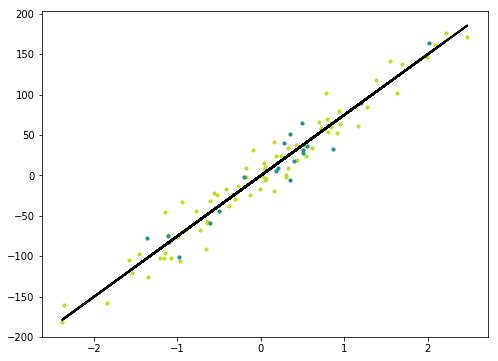

In [11]:
%matplotlib inline 

# define loss
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# use a dummy dataset fromsklearn
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# create model instance
regressor = LinearRegression(learning_rate=0.01, n_epochs=1000)
regressor.fit(X_train, y_train)

# extract predictions
predictions = regressor.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

# get params

print('slope: ', regressor._coefs()[0])
print('bias: ', regressor._coefs()[1])

y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show()

# Ridge regression

In [44]:
class RidgeRegression:

    def __init__(self, l = 1, learning_rate=0.001, n_epochs=1000):
        self.lr = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None
        self._lambda = l

    def fit(self, X, y):
        # if consider in matrux form
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            # 2 can drop because the minumum it isn't affected by constant
            # need to transpose X to match sizes vectors
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) # dot product alread computs the sum
            # no need to loop to calculate the sums
            
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw + self._lambda * (self.lr * dw)**2 # added regularization
            self.bias -= self.lr * db
 

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated
    
    def _coefs(self):
        return self.weights, self.bias
    

MSE: 471.5152068573474
slope:  [58.61277487]
bias:  0.33332548859600486


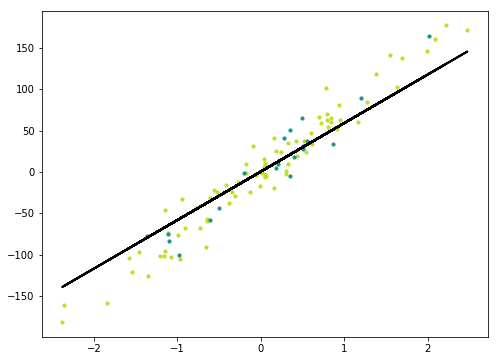

In [43]:
%matplotlib inline 

# define loss
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# use a dummy dataset fromsklearn
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# create model instance
regressor = RidgeRegression(l = 0,learning_rate=0.001, n_epochs=1500)
regressor.fit(X_train, y_train)

# extract predictions
predictions = regressor.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

# get params

print('slope: ', regressor._coefs()[0])
print('bias: ', regressor._coefs()[1])

y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show()